# 1. Series

* Series란?
Data의 컬럼이 1개인 구조, index(행)과 1개의 열로 구성  
-> 열이 여러개면 DataFrame이 됨

## 1.1 Series 만드는 법

* pd.Series()에 Datatype이 list, dict인 구조로 만들 수 있음
* 딕셔너리의 경우 key, value가 함께 만들어짐

In [6]:
# 판다스 불러오가
import pandas as pd

In [14]:
# Data Type이 리스트인 경우
list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list2 = [1, 2, 3, 'apple', 'play', 6, 7, 8, 9]

sr1 = pd.Series(list1) # pd.Series(대상 데이터)
print(sr1)

sr2 = pd.Series(list2) # value의 타입이 달라도 상관 없음
print(sr2)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64
0        1
1        2
2        3
3    apple
4     play
5        6
6        7
7        8
8        9
dtype: object


In [18]:
# Series에 Name 설정

sr1.name = "Number" # Value열의 이름을 설정
sr2.name = "Word"

print(sr1)
print(sr2)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: Number, dtype: int64
0        1
1        2
2        3
3    apple
4     play
5        6
6        7
7        8
8        9
Name: Word, dtype: object


In [28]:
# Data Type이 딕셔너리인 경우
dic1 = {"a": 1, "b": 2, "c": 3, "d": 4}

sr3 = pd.Series(dic1)
sr3.name = "Number"
print(sr3)

a    1
b    2
c    3
d    4
Name: Number, dtype: int64


* key값이 index로<br>
* value값이 값으로 들어가는 것을 볼 수 있음

## 1.2 삼성전자 종가 Series로 불러오기

pd.read_csv() 함수에서 주로 사용하는 요소들을 공부
* path: 파일 경로
* index_col: index로 지정할 컬럼
* squezze: Series로 지정할지 여부
* header: 헤더값의 index

In [46]:
import pandas as pd

a = pd.read_csv("삼성전자 종가.csv") # 파일 주소로 불러오기(절대 주소, 상대 주소 모두 가능)
print(a)
type(a) # 이 경우 열이 2개이기 때문에 데이터프레임 타입임

           Date  Close
0    2018-01-02  51020
1    2018-01-03  51620
2    2018-01-04  51080
3    2018-01-05  52120
4    2018-01-08  52020
..          ...    ...
972  2021-12-13  76800
973  2021-12-14  77000
974  2021-12-15  77600
975  2021-12-16  77800
976  2021-12-17  78000

[977 rows x 2 columns]


pandas.core.frame.DataFrame

In [54]:
a = pd.read_csv("삼성전자 종가.csv", index_col = 0) # 0번째 열이 index가 됨
print(a)
type(a) # 하지만 이 경우에도 타입은 df

            Close
Date             
2018-01-02  51020
2018-01-03  51620
2018-01-04  51080
2018-01-05  52120
2018-01-08  52020
...           ...
2021-12-13  76800
2021-12-14  77000
2021-12-15  77600
2021-12-16  77800
2021-12-17  78000

[977 rows x 1 columns]


pandas.core.frame.DataFrame

In [60]:
a = pd.read_csv("삼성전자 종가.csv", index_col = 0).squeeze() # squeeze()함수를 통해 Series로 지정 가능
print(a)
type(a)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


pandas.core.series.Series

In [66]:
a = pd.read_csv("삼성전자 종가.csv", index_col = 0, header = 1).squeeze() # header값 인덱스를 1으로 지정
print(a) # index의 헤더값이 1번째 값이 된 것을 볼 수 있음

2018-01-02
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
2018-01-09    50400
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: 51020, Length: 976, dtype: int64


In [72]:
a = pd.read_csv("삼성전자 종가.csv", index_col = 0, header = 0).squeeze() # header값 인덱스를 0으로 지정
print(a) # index의 헤더값이 Date가 된 것을 볼 수 있음

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


## 1.3 Series의 Index와 Value

* loc: index의 값을 통해 탐색
* iloc: index의 순서를 통해 탐색

In [78]:
import pandas as pd
samsung_price = pd.read_csv("삼성전자 종가.csv", index_col = 0, header = 0).squeeze()
print(samsung_price)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


In [82]:
# samsung_price의 index만 따로 추출
print(samsung_price.index)

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)


In [90]:
# 2020-12-15 Data가 있을까?
if '2020-12-15' in samsung_price.index: # 'in'을 사용하면 bool타입으로 값이 있는지 반환
    print(samsung_price.loc['2020-12-15']) # loc는 index의 값을 통해 value를 꺼내올 수 있음

73800


In [98]:
# 100번째 Data값은?

print(samsung_price.iloc[100]) # iloc는 index값을 이용해 출력

49500


## 1-4 Series에 새로운 행을 추가하고 싶을때?

In [8]:
import pandas as pd

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col = 0, header=0).squeeze()

print(samsung_price)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


In [14]:
# samsung_price의 총 길이는?
print(samsung_price.shape) # 행의 갯수, 열의 갯수를 튜플로 출력 
print(samsung_price.shape[0]) # 행만 잘라서 출력

(977,)
977


In [24]:
# loc를 통해 index 추가/수정하는 법
samsung_price['2021-12-20'] = 77100 # 기존에 존재하지 않았던 index를 넣어주어 새로운 값을 추가, loc는 생략하고 슬라이싱해도 결과는 같음
samsung_price.loc['2021-12-16'] = 0 # loc를 통해 값 수정
print(samsung_price)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16        0
2021-12-17    78000
2021-12-20    77100
Name: Close, Length: 978, dtype: int64


In [26]:
samsung_price.iloc[1000] = 0 # iloc는 기존에 존재하지 않았던 index에 접근하면 오류 발생

IndexError: iloc cannot enlarge its target object

## 1.5 두 개의 Series 연결

pd.read_excel('주소', sheet_name='시트이름', index_col) 양식으로 excel파일을 읽어줄 수 있음
* sheet_name을 지정하지 않았을 경우 첫 시트가 불러와짐

In [53]:
import pandas as pd

series1_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet1', index_col=0).squeeze()
print(series1_samsung)

series2_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet2', index_col=0).squeeze()
print(series2_samsung)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2019-12-23    55500
2019-12-24    55000
2019-12-26    55400
2019-12-27    56500
2019-12-30    55800
Name: Close, Length: 490, dtype: int64
Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 492, dtype: int64


pd.concat([시리즈1, 시리즈2], ignore_index=bool)
* concat 함수를 통해 두 시리즈를 이어줄 수 있음
* 이때 ignore_index=False여야 기존 index를 유지하면서 붙일 수 있음

In [79]:
series_samsung = pd.concat([series1_samsung, series2_samsung], ignore_index=False)
print(series_samsung)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64


## 1.6 Series 기본 통계치 구하기

In [82]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header=0).squeeze()
print(samsung_price)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


In [86]:
# 기초 통계

print(samsung_price.max()) # 최대값
print(samsung_price.min()) # 최소값
print(samsung_price.describe()) # 기초통계

91000
37450
count      977.000000
mean     57295.854657
std      14084.402274
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64


In [94]:
# 그렇다면 최댓값과 최소값일 때 index는 어떻게 찾을까?

print(samsung_price.argmax()) # 최댓값일 때 index(순서)
print(samsung_price.argmin()) # 최소값일 때 index(순서)

743
246


In [102]:
# 위에서 찾은 순서를 이용해 index값을 구해보자
print(samsung_price.index[samsung_price.argmax()]) # index 리스트를 통해 최댓값 일때 index value를 찾기
print(samsung_price.index[samsung_price.argmin()]) # index 리스트를 통해 최소값 일때 index value를 찾기

2021-01-11
2019-01-04


## 1.7 Series 연산
* 부제: 삼성전자 수익률 구하기

In [1]:
import pandas as pd

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
print(samsung_price)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64


In [2]:
# array.shift(n=1): value를 n칸씩 뒤로 밀어주는 메소드
samsung_price.shift()

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [5]:
print(samsung_price - samsung_price.shift(1)) # 오늘의 값 - 하루 전 (첫 날은 NaN이 계산에 끼니까 NaN)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64


In [7]:
print((samsung_price - samsung_price.shift(1)) / samsung_price.shift(1)) # 수익률 시리즈 출력

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64


In [9]:
print(samsung_price.pct_change()) # 위에서 계산한 변동률을 계산해 출력해 주는 함수

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64


In [11]:
# 그렇다면 최대 수익률을 구하는 법은? -> 배웠잔아!!!

pct = samsung_price.pct_change()

print(pct.index[pct.argmax()]) # 수익률 Series에서 argmax로 인덱스에 접근

2020-03-24


## 1.8 Nan값
* fillna(n) Nan값을 n으로 채우기
* dropna() Nan값 버리기

In [14]:
import pandas as pd

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
pct = samsung_price.pct_change()
print(pct)

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64


In [16]:
# 계산 과정에서 결측치를 만들어 버리는 Nan값을 처리하기
pct.fillna(0) # Nan값 0으로 채우기

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [18]:
pct.dropna() # Nan값 제거

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

## 1.9 정렬
Series.sort_index(ascending=bool): index 기준으로 정렬  
Series.sort_value(ascending=bool): value 기준으로 정렬
* 이 때 ascending이 True면 오름차순, False면 내림차순

In [24]:
import pandas as pd

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
pct = samsung_price.pct_change()
print(pct)

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64


In [26]:
# index 순서대로 정렬
samsung_price.sort_index(ascending=True)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [32]:
# value 순서대로 정렬
samsung_price.sort_values(ascending=False).head(30)

Date
2021-01-11    91000
2021-01-12    90600
2021-01-14    89700
2021-01-13    89700
2021-01-25    89400
2021-01-08    88800
2021-01-21    88100
2021-01-15    88000
2021-01-20    87200
2021-01-19    87000
2021-01-22    86800
2021-01-26    86700
2021-04-06    86000
2021-01-27    85600
2021-04-07    85600
2021-04-05    85400
2021-02-25    85300
2021-01-18    85000
2021-02-16    84900
2021-04-02    84800
2021-04-08    84700
2021-02-03    84600
2021-02-02    84400
2021-02-15    84200
2021-04-15    84100
2021-04-13    84000
2021-04-14    84000
2021-03-03    84000
2021-04-16    83900
2021-04-20    83900
Name: Close, dtype: int64

## 1.10 Series 조건설정
np.where(조건문, 조건문이 참일 경우 값, 거짓일 때 값) -> arr으로 복사 후 반환

In [43]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
pct = samsung_price.pct_change() * 100 # %스케일로 변환
print(pct)

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64


In [49]:
sum(pct.values >= 4) # 4 이상의 갯수

17

In [69]:
pct_over4 = np.where(pct.values >= 4, 1, 0) # pct.values의 값 중 4이상인 것은 1, 아닌 것은 0인 arr 생성
pct_over4 = pd.Series(pct_over4)
pct_over4.index = pct.index
print(pct_over4)

Date
2018-01-02    0
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2021-12-13    0
2021-12-14    0
2021-12-15    0
2021-12-16    0
2021-12-17    0
Length: 977, dtype: int64


## 1.11 Rolling(이동 평균)
series.rolling(window = days): days에 넣은만큼의 기간 동안 이동**을 구할 수 있음

In [77]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
pct = samsung_price.pct_change() * 100 # %스케일로 변환
print(pct)

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64


In [85]:
samsung_price.rolling(window=30).mean() # 지난 30일에 대한 이동평균(맨 앞 29개는 NaN으로 표기)

Rolling [window=30,center=False,axis=0,method=single]

<Axes: xlabel='Date'>

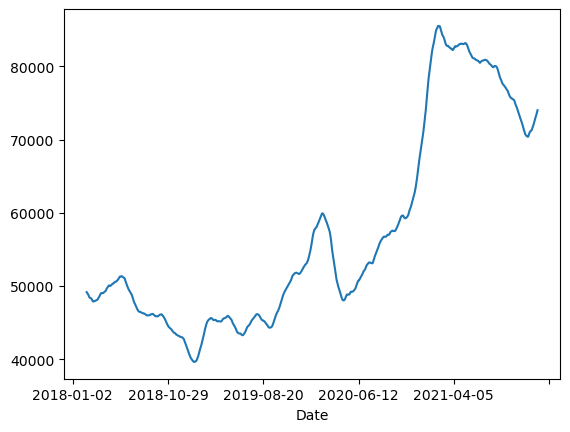

In [89]:
samsung_price.rolling(window=30).mean().plot() # 그래프로 그려서 경향성 확인이 가능함

## 1.12 Sereis값의 구간을 나눠보자
pd.cut(series, bins = n): 각 구간의 값의 분포가 균등하도록 n개 만큼 구간을 나눔  
pd.qcut(series, n): 각 구간에 들어있는 갯수가 균등하도록 n개로 구간을 나눔

In [116]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
pct = samsung_price.pct_change() * 100 # %스케일로 변환
print(pct)

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64


In [118]:
# pd.cut()
pd.cut(pct, bins=10) # 10개 구간으로 나눠줌, 아래에는 나눈 기준이 나눠짐

Date
2018-01-02               NaN
2018-01-03    (0.356, 2.041]
2018-01-04    (-1.33, 0.356]
2018-01-05    (0.356, 2.041]
2018-01-08    (-1.33, 0.356]
                   ...      
2021-12-13    (-1.33, 0.356]
2021-12-14    (-1.33, 0.356]
2021-12-15    (0.356, 2.041]
2021-12-16    (-1.33, 0.356]
2021-12-17    (-1.33, 0.356]
Name: Close, Length: 977, dtype: category
Categories (10, interval[float64, right]): [(-6.405, -4.702] < (-4.702, -3.016] < (-3.016, -1.33] < (-1.33, 0.356] ... (3.727, 5.413] < (5.413, 7.099] < (7.099, 8.785] < (8.785, 10.471]]

In [120]:
pd.cut(pct, bins=10).value_counts() # 구간별로 value의 갯수를 셀 수 있음

Close
(-1.33, 0.356]      414
(0.356, 2.041]      298
(-3.016, -1.33]     137
(2.041, 3.727]       70
(-4.702, -3.016]     31
(3.727, 5.413]       19
(-6.405, -4.702]      3
(5.413, 7.099]        2
(7.099, 8.785]        1
(8.785, 10.471]       1
Name: count, dtype: int64

In [124]:
# pd.qcut()
pd.qcut(pct, 10) # 각 구간이 가지고 있는 값의 갯수가 비슷하도록 10개로 나눔
pd.qcut(pct, 10).value_counts()

Close
(-0.332, 0.0]       108
(-6.389, -1.938]     98
(-1.938, -1.161]     98
(-0.702, -0.332]     98
(0.753, 1.22]        98
(2.003, 10.471]      98
(-1.161, -0.702]     97
(0.358, 0.753]       97
(1.22, 2.003]        97
(0.0, 0.358]         87
Name: count, dtype: int64

## 1.13 크기가 다른 두 Series

In [1]:
import pandas as pd
import numpy as np

samsung = pd.read_csv("삼성전자 종가.csv", index_col=0, header=0).squeeze()
print(samsung)
kospi = pd.read_csv("KOSPI.csv", index_col=0, header=0).squeeze()
print(kospi)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64
Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64


In [2]:
# 두 시리즈의 길이가 다름을 확인
print(samsung.shape)
print(kospi.shape)

(977,)
(477,)


In [5]:
# kospi는 자료가 2020.01.02부터 있음
# 삼성 전자의 인덱스 슬라이싱을 통해 두 자료간의 index를 맞춰줄 예점
samsung = samsung.loc['2020-01-02':]
print(samsung)
print(samsung.shape)
print(kospi.shape) # 하지만 그럼에도 불구하고 kospi가 더 적음

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 487, dtype: int64
(487,)
(477,)


In [7]:
# samsung의 값 중 kospi.index와 호환되는 것만 슬라이싱해 저장
samsung_slice = samsung.loc[kospi.index]
samsung_slice.shape

(477,)

In [11]:
# 상관관계 구하기
samsung_slice.corr(kospi)

0.9583971132808289

In [15]:
samsung.corr(kospi) # 길이가 달라도 index가 같은 것끼리만 계산해줬기에 상관관계가 구해짐

0.9583971132808289

In [21]:
# 넘파이 상관관계가 구해짐
np.corrcoef(samsung_slice, kospi)

array([[1.        , 0.95839711],
       [0.95839711, 1.        ]])

In [23]:
np.corrcoef(samsung, kospi) # 넘파이 메소드를 이용할 경우에는 갯수가 다르면 오류남

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 487 and the array at index 1 has size 477